In [1]:
pip install pandas scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [26]:
import pandas as pd

# Lee el archivo CSV
encuesta_df = pd.read_csv('encuesta_procesada.csv')

In [27]:
encuesta_df

,Marca temporal,1.- Datos demográficos del cliente\n¿Qué edad tiene?:,2.- Género:,3.- ¿Qué nivel educativo tiene?,4.- ¿Cuántos miembros compone su familia?,5.- ¿Con qué frecuencia conduce?,6.- ¿Qué tipo de carreteras utiliza con más frecuencia?,7.- ¿Con qué frecuencia conduce por la noche?,8.- ¿Qué tan preocupado está por la seguridad de sus vehículos y activos?,9.- ¿Ha sido víctima de algún robo o hurto en los últimos 5 años?,...,14.- ¿Cómo Ud se enteró que existe el servicio de rastreo satelital?,15.- ¿Qué otras soluciones de seguridad utiliza en su vehículo?,16.- ¿Qué considera Ud. que necesita una aplicación móvil para rastrear vehículos y activos?,17.- ¿Qué tipo de beneficios busca al utilizar un servicio de rastreo satelital?,18.- ¿Ha recibido alguna vez alertas de seguridad o emergencias relacionadas con su ubicación?,19.- ¿Conoce Ud. el proceso para adquirir un servicio de rastreo satelital?,20.- ¿Prefiere comprar el rastreo satelital en efectivo o a crédito?,21.- ¿Ha tenido alguna vez problemas con el robo o la pérdida de sus vehículos?,22.- ¿Qué tan importante es para usted tener acceso a la información en tiempo real sobre la ubicación de sus vehículos o activos?,23.- ¿Qué empresas de rastreo satelital conoce?
0,2024/05/01 4:53:50 p. m. GMT-5,25 a 35 años,Femenino,Universitario,1-3 miembros,Diariamente,Autopistas,Nunca,Preocupado,No,...,Publicidad en redes sociales o plataformas dig...,Ninguna,GPS Tracker – Video tracking,Monitoreo en tiempo real,No,Si,Crédito,Si,Importartante,Rastreo 365
1,2024/05/01 4:54:51 p. m. GMT-5,25 a 35 años,Masculino,Posgrado,4-6 miembros,Diariamente,Calles urbanas,Diariamente,Neutral,No,...,Recomendación de un amigo o familiar,Sistemas de alarma,GPS Tracker – Video tracking,Protección de sus vehículos;Monitoreo en tiemp...,No,No,Crédito,No,Importartante,Rastreo365
2,2024/05/01 4:56:25 p. m. GMT-5,35 a 44 años,Femenino,Universitario,4-6 miembros,Nunca,Bus,Nunca,Neutral,No,...,Recomendación de un amigo o familiar,Sistemas de alarma,Imágenes en 3D,Protección de sus vehículos,No,Si,Efectivo,No,Importartante,Hunter
3,2024/05/01 5:00:05 p. m. GMT-5,45 a 54 años,Masculino,Universitario,1-3 miembros,Una vez a la semana,Calles urbanas,Nunca,Preocupado,No,...,Publicidad en redes sociales o plataformas dig...,Sistemas de alarma,GPS Tracker – Video tracking,Protección de sus vehículos,No,Si,Efectivo,No,Importartante,Rastreo 365
4,2024/05/01 5:00:08 p. m. GMT-5,45 a 54 años,Femenino,Técnico,4-6 miembros,Una vez a la semana,Caminos rurales,Diariamente,Neutral,No,...,Recomendación de un amigo o familiar,Sistemas de alarma,Compartir ubicación en tiempo real,Monitoreo en tiempo real,Si,No,Crédito,No,Importartante,No conozco
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2024/05/01 9:56:40 p. m. GMT-5,25 a 35 años,Masculino,Universitario,7 o más miembros,Varias veces a la semana,Bus,Ocasionalmente,Preocupado,No,...,Publicidad en redes sociales o plataformas dig...,Control de acceso automático y remoto;GPS inal...,Compartir ubicación en tiempo real,Monitoreo en tiempo real;Informes detallados,Si,No,Efectivo,No,Importartante,Ninguna
499,2024/05/01 9:20:32 p. m. GMT-5,25 a 35 años,Masculino,Posgrado,1-3 miembros,Varias veces a la semana,Calles urbanas,Ocasionalmente,Preocupado,No,...,Precisión de rastreo,Sistemas de alarma,GPS Tracker – Video tracking,Protección de sus vehículos;Monitoreo en tiemp...,Si,Si,Crédito,No,Importartante,Chevystar
500,2024/05/06 9:45:56 a. m. GMT-5,35 a 44 años,Masculino,Técnico,1-3 miembros,Diariamente,Bus,Ocasionalmente,Neutral,Si,...,Publicidad en redes sociales o plataformas dig...,Ninguna,GPS Tracker – Video tracking,Protección de sus vehículos;Monitoreo en tiemp...,No,No,Efectivo,No,Importartante,Ninguna
501,2024/05/01 7:33:26 p. m. GMT-5,35 a 44 años,Masculino,Universitario,4-6 miembros,Varias veces a la semana,Calles urbanas,Ocasionalmente,Preocupado,Si,...,Recomendación de un amigo o familiar,GPS inalámbrico independiente,Imágene

In [28]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [29]:

# Paso 2: Seleccionar y renombrar las columnas relevantes
selected_columns = [
    '5.- ¿Con qué frecuencia conduce?',
    '6.- ¿Qué tipo de carreteras utiliza con más frecuencia?',
    '7.- ¿Con qué frecuencia conduce por la noche?',
    '10.- ¿Qué le motiva a comprar un servicio de rastreo satelital?',
    '11.- Si tuviera Ud. Rastreo Satelital, ¿Qué considera importante rastrear?',
    '16.- ¿Qué considera Ud. que necesita una aplicación móvil para rastrear vehículos y activos?',
    '17.- ¿Qué tipo de beneficios busca al utilizar un servicio de rastreo satelital?', 
    '21.- ¿Ha tenido alguna vez problemas con el robo o la pérdida de sus vehículos?',
    '22.- ¿Qué tan importante es para usted tener acceso a la información en tiempo real sobre la ubicación de sus vehículos o activos?'
]

filtered_df = encuesta_df[selected_columns]
filtered_df.columns = [
    'Frecuencia_Conduccion',
    'Tipo_Carretera',
    'Frecuencia_Conduccion_Noche',
    'Motivacion para comprar rastreo',
    'Mas importante en rastreo satelital',
    'Necesita App para rastreo',
    'Beneficios de rastreo Satelital',
    'Problemas con robo en sus vehiculos',
    'Importancia_Info_Real'
]


In [30]:
# Paso 3: Codificar las variables categóricas
label_encoders = {}
for column in filtered_df.columns:
    le = LabelEncoder()
    filtered_df.loc[:, column] = le.fit_transform(filtered_df[column])
    label_encoders[column] = le
    

In [31]:

# Paso 4: Normalizar los datos
scaler = StandardScaler()
normalized_data = scaler.fit_transform(filtered_df)


In [32]:
# Paso 5: Determinar el número óptimo de clusters usando el método del codo
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)


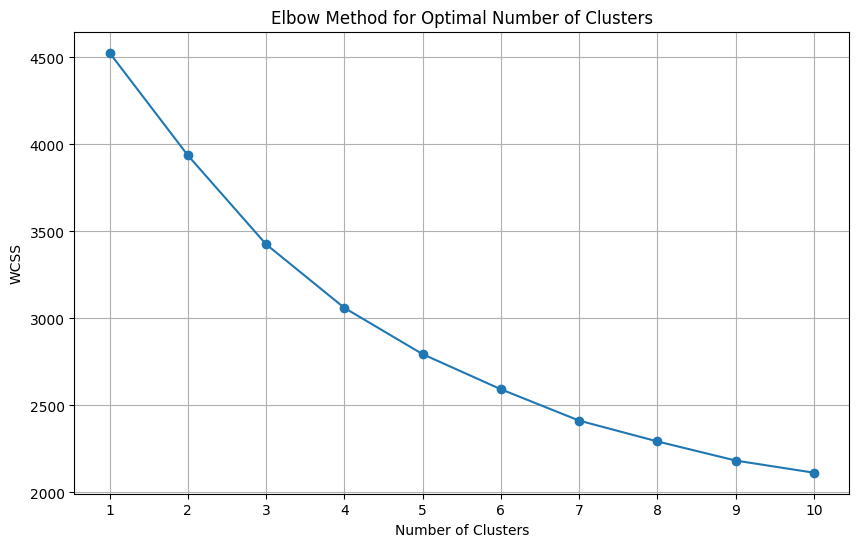

In [33]:

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()



In [34]:
# Paso 6: Aplicar KMeans con el número óptimo de clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(normalized_data)

# Agregar las etiquetas de los clusters al dataframe original usando .loc
filtered_df = filtered_df.copy()
filtered_df.loc[:, 'Cluster'] = clusters



In [35]:
# Paso 7: Reducir la dimensionalidad a 2D usando PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(normalized_data)



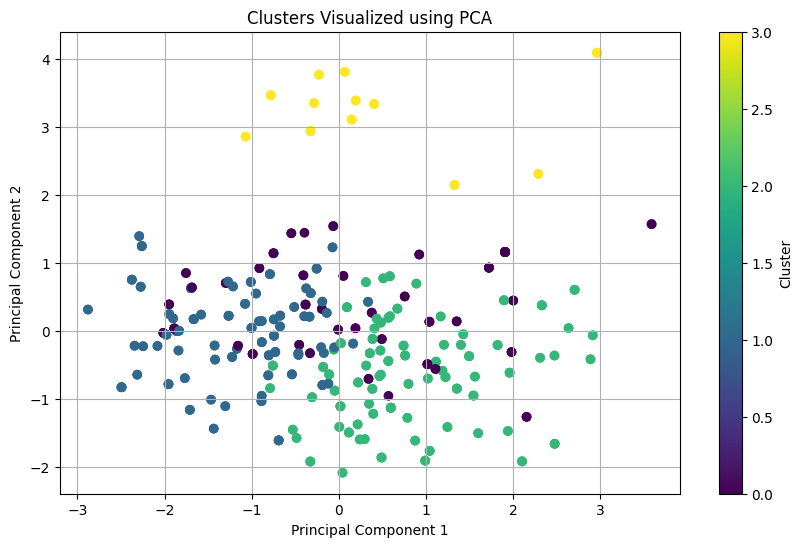

  Frecuencia_Conduccion Tipo_Carretera Frecuencia_Conduccion_Noche  \
0                     0              0                           1   
1                     0              2                           0   
2                     2              1                           1   
3                     3              2                           1   
4                     3              3                           0   

  Motivacion para comprar rastreo Mas importante en rastreo satelital  \
0                              15                                   4   
1                               7                                   8   
2                               7                                  10   
3                               7                                   4   
4                               7                                   4   

  Necesita App para rastreo Beneficios de rastreo Satelital  \
0                         3                               2   
1             

In [36]:
# Paso 8: Graficar los clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualized using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

# Mostrar las primeras filas con las etiquetas de los clusters
print(filtered_df.head())

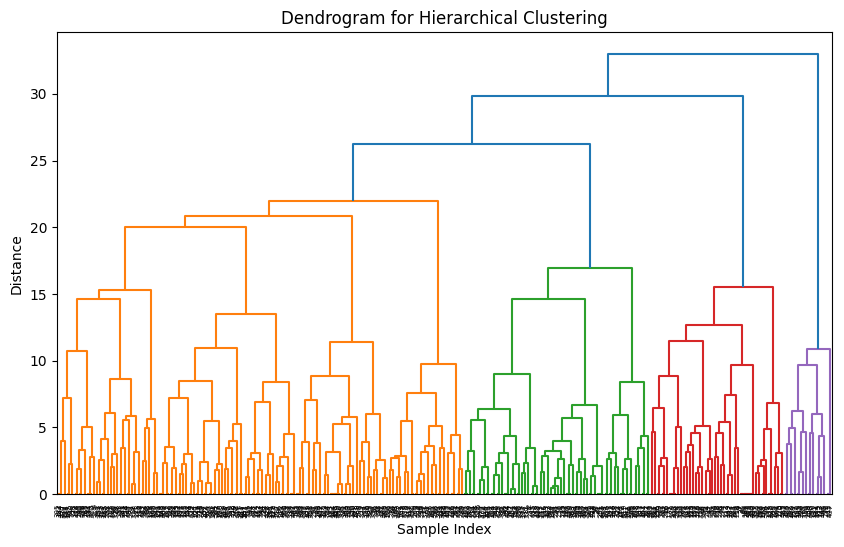

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Realizar el clustering jerárquico
linked = linkage(normalized_data, 'ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


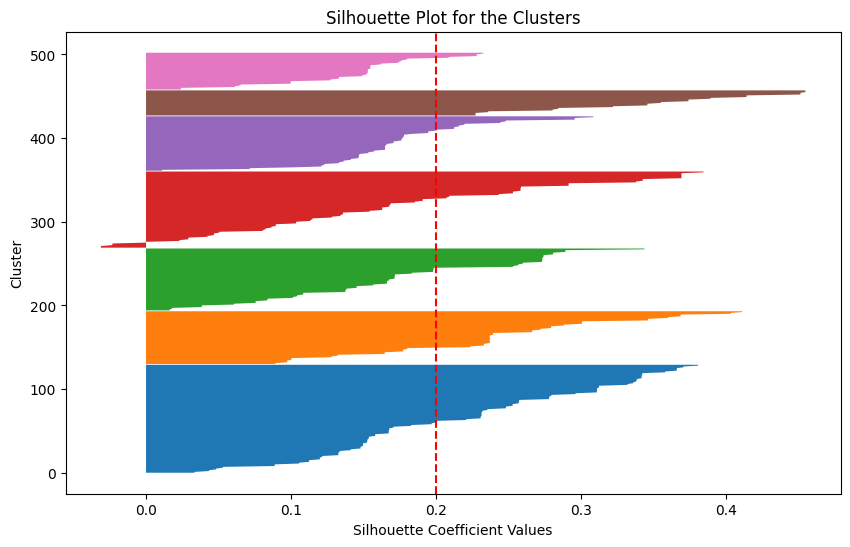

In [15]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# Calcular los coeficientes de silueta para cada punto
silhouette_vals = silhouette_samples(normalized_data, clusters)

# Graficar el gráfico de silueta
plt.figure(figsize=(10, 6))
y_lower, y_upper = 0, 0
for i in range(optimal_clusters):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    y_lower += len(cluster_silhouette_vals)

plt.title('Silhouette Plot for the Clusters')
plt.xlabel('Silhouette Coefficient Values')
plt.ylabel('Cluster')
plt.axvline(x=silhouette_score(normalized_data, clusters), color="red", linestyle="--")
plt.show()


In [16]:
pip install umap-learn


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   -------------- ------------------------- 30.7/85.7 kB 660.6 kB/s eta 0:00:01
   -------------- ------------------------- 30.7/85.7 kB 660.6 kB/s eta 0:00:01
   -------------------------------------- - 81.9/85.7 kB 657.6 kB/s eta 0:00:01
   ---------------------------------------- 85.7/85.7 kB 603.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.6 MB 2.4 MB/s eta 0:00:02
   - -------------------------------------- 0.1/2.6 MB 2.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/2.6 MB 1.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.3/2.6 MB 1.8 MB/s eta 0:00:02
   ---- ----------------------------------- 0.3/2.6 MB 1.5 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/2.6 MB 2.0 MB/s eta 0:00:02
   ----

In [16]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

C:\Users\mdjqp\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


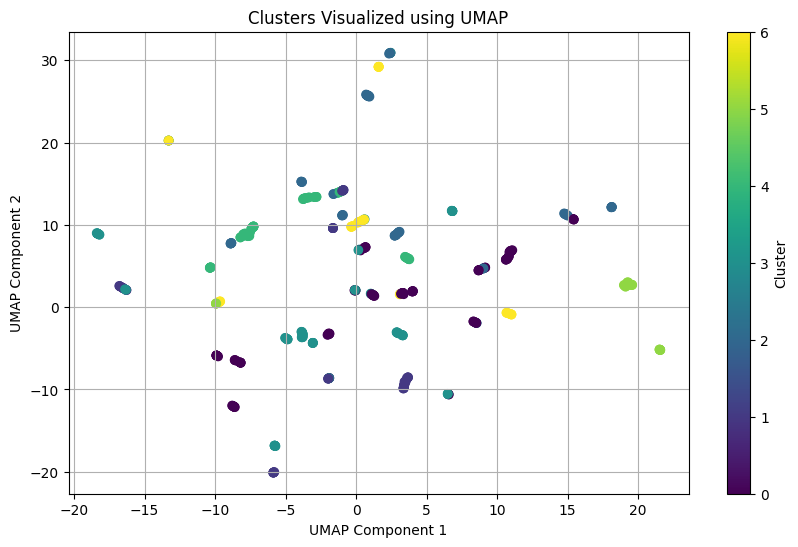

In [17]:
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Reducir la dimensionalidad a 2D usando UMAP
umap_reducer = umap.UMAP(random_state=42)
umap_components = umap_reducer.fit_transform(normalized_data)

# Graficar los clusters usando UMAP
plt.figure(figsize=(10, 6))
scatter = plt.scatter(umap_components[:, 0], umap_components[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualized using UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


C:\Users\mdjqp\AppData\Roaming\Python\Python311\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


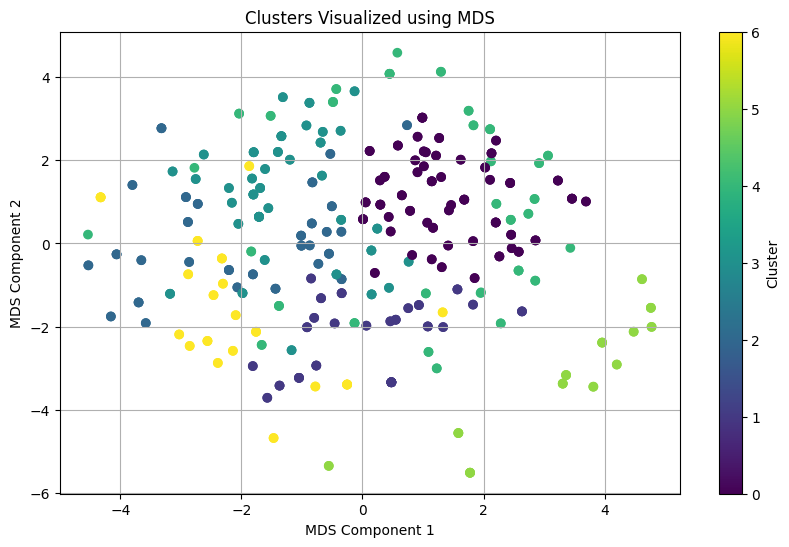

In [18]:
from sklearn.manifold import MDS

# Reducir la dimensionalidad a 2D usando MDS
mds = MDS(n_components=2, random_state=42)
mds_components = mds.fit_transform(normalized_data)

# Graficar los clusters usando MDS
plt.figure(figsize=(10, 6))
scatter = plt.scatter(mds_components[:, 0], mds_components[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualized using MDS')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()


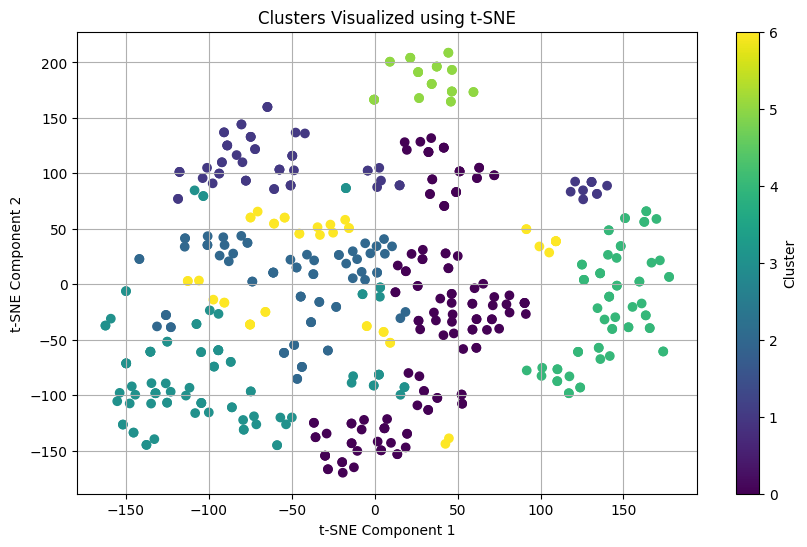

In [19]:
from sklearn.manifold import TSNE

# Reducir la dimensionalidad a 2D usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(normalized_data)

# Graficar los clusters usando t-SNE
plt.figure(figsize=(10, 6))
scatter = plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualized using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()
